In [1122]:
import pandas as pd
import numpy as np

In [1124]:
#Access the data sets
def read_csv(file_name):
    file_path="/Users/priyanka/Desktop/case study/data/"+ file_name
    return pd.read_csv(file_path,low_memory=False)

In [1126]:
# function to check missing values in df
def get_null_counts(df):
    null_counts = df.isnull().sum()
    return null_counts[null_counts > 0]

In [1128]:
airport_codes=read_csv("Airport_codes.csv")
flights=read_csv("Flights.csv")
tickets_df=read_csv("Tickets.csv")

In [1130]:
airport_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float64
 3   CONTINENT     27526 non-null  object 
 4   ISO_COUNTRY   55122 non-null  object 
 5   MUNICIPALITY  49663 non-null  object 
 6   IATA_CODE     9182 non-null   object 
 7   COORDINATES   55369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


In [1132]:
airport_codes = airport_codes[airport_codes['ISO_COUNTRY'] == 'US']
airport_codes.reset_index(drop=True, inplace=True)

In [1134]:
#filtering only for large and medium airports
airport_codes = airport_codes[airport_codes['TYPE'].isin({'medium_airport', 'large_airport'})]

In [1136]:
airport_codes['TYPE'].unique()

array(['medium_airport', 'large_airport'], dtype=object)

In [1138]:
#checking the null values in each column in the df 
null_columns = get_null_counts(airport_codes)
print("Columns with missing values:")
print(null_columns)

Columns with missing values:
ELEVATION_FT      3
CONTINENT       858
MUNICIPALITY      3
IATA_CODE        37
dtype: int64


In [1140]:
# filling only IATA Code with unknown, for the rest of the fields we dont need them in our analysis so not filling or considering them
airport_codes['IATA_CODE'] = airport_codes['IATA_CODE'].fillna('Unknown')

In [1142]:
airport_counts = airport_codes.groupby('TYPE').size().reset_index(name='count')
airport_counts

,TYPE,count
0,large_airport,171
1,medium_airport,687


In [1144]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915886 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           object 
 14  DISTANCE           object 
 15  OCCUPANCY_RATE     float64
dtypes: float64(4), int64(2), object(10)
memory usage: 233.9+ MB


In [1146]:
#Changing the datatype of airtime and distance as they are suppose to be numeric
flights[['AIR_TIME', 'DISTANCE']] = flights[['AIR_TIME', 'DISTANCE']].apply(
    lambda x: pd.to_numeric(x, errors='coerce')
)
print(flights.dtypes[['AIR_TIME', 'DISTANCE']])

AIR_TIME    float64
DISTANCE    float64
dtype: object


In [1148]:
# Fill NaNs in Distance and airtime and Occupancy with their respective medians
flights[['DISTANCE', 'AIR_TIME','OCCUPANCY_RATE']] = flights[['DISTANCE', 'AIR_TIME','OCCUPANCY_RATE']].apply(lambda col: col.fillna(col.median()))


In [1150]:
flights['CANCELLED'] = flights['CANCELLED'].round().astype(int)

In [1152]:
flights.shape

(1915886, 16)

In [1154]:
#Excluding the cancelled flights
flights=flights[flights['CANCELLED'] == 0]
flights.reset_index(drop=True, inplace=True)

In [1156]:
flights.shape

(1864272, 16)

In [1158]:
print(flights['CANCELLED'].unique())

[0]


In [1160]:
flight_count= flights.groupby('CANCELLED').size().reset_index(name='count')
flight_count

,CANCELLED,count
0,0,1864272


In [1162]:
#Finding the null values in flights 
get_null_counts(flights)

ARR_DELAY    4377
dtype: int64

In [1164]:
#Checking the format of the date's to make all of them in the same format
print(flights['FL_DATE'].unique())

['2019-03-02' '2019-03-03' '2019-03-09' '2019-03-10' '2019-03-24'
 '2019-03-28' '2019-03-29' '2019-03-30' '2019-03-20' '2019-03-25'
 '2019-03-26' '2019-03-31' '2019-03-13' '2019-03-14' '2019-03-12'
 '2019-03-11' '2019-03-15' '2019-03-16' '2019-03-17' '2019-03-18'
 '2019-03-19' '2019-03-21' '2019-03-22' '2019-03-23' '2019-03-27'
 '2019-03-01' '2019-03-04' '2019-03-05' '2019-03-06' '2019-03-07'
 '2019-03-08' '2019-02-17' '2019-02-18' '2019-02-19' '2019-02-20'
 '2019-02-21' '2019-02-22' '2019-02-23' '2019-02-24' '2019-02-26'
 '2019-02-27' '2019-02-28' '2019-02-01' '2019-02-02' '2019-02-03'
 '2019-02-04' '2019-02-05' '2019-02-06' '2019-02-07' '2019-02-08'
 '2019-02-09' '2019-02-10' '2019-02-11' '2019-02-12' '2019-02-13'
 '2019-02-14' '2019-02-15' '2019-02-16' '2019-02-25' '2019-01-21'
 '2019-01-24' '2019-01-25' '2019-01-26' '2019-01-27' '2019-01-28'
 '2019-01-31' '2019-01-01' '2019-01-02' '2019-01-03' '2019-01-04'
 '2019-01-05' '2019-01-06' '2019-01-07' '2019-01-08' '2019-01-09'
 '2019-01-

In [1166]:
#Checking with different format's and changing them to yyyy-mm-dd format
mmddyy_mask = flights['FL_DATE'].str.match(r'^\d{1,2}/\d{1,2}/\d{2}$')

# Step 2: Convert only those rows
flights.loc[mmddyy_mask, 'FL_DATE'] = pd.to_datetime(
    flights.loc[mmddyy_mask, 'FL_DATE'],
    format='%m/%d/%y',
    errors='coerce'
).dt.strftime('%Y-%m-%d')  # Output in YYYY-MM-DD format

In [1168]:
print(flights['FL_DATE'].unique())

['2019-03-02' '2019-03-03' '2019-03-09' '2019-03-10' '2019-03-24'
 '2019-03-28' '2019-03-29' '2019-03-30' '2019-03-20' '2019-03-25'
 '2019-03-26' '2019-03-31' '2019-03-13' '2019-03-14' '2019-03-12'
 '2019-03-11' '2019-03-15' '2019-03-16' '2019-03-17' '2019-03-18'
 '2019-03-19' '2019-03-21' '2019-03-22' '2019-03-23' '2019-03-27'
 '2019-03-01' '2019-03-04' '2019-03-05' '2019-03-06' '2019-03-07'
 '2019-03-08' '2019-02-17' '2019-02-18' '2019-02-19' '2019-02-20'
 '2019-02-21' '2019-02-22' '2019-02-23' '2019-02-24' '2019-02-26'
 '2019-02-27' '2019-02-28' '2019-02-01' '2019-02-02' '2019-02-03'
 '2019-02-04' '2019-02-05' '2019-02-06' '2019-02-07' '2019-02-08'
 '2019-02-09' '2019-02-10' '2019-02-11' '2019-02-12' '2019-02-13'
 '2019-02-14' '2019-02-15' '2019-02-16' '2019-02-25' '2019-01-21'
 '2019-01-24' '2019-01-25' '2019-01-26' '2019-01-27' '2019-01-28'
 '2019-01-31' '2019-01-01' '2019-01-02' '2019-01-03' '2019-01-04'
 '2019-01-05' '2019-01-06' '2019-01-07' '2019-01-08' '2019-01-09'
 '2019-01-

In [1170]:
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1166325 non-null  object 
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 106.9+ MB


In [1172]:
tickets_df['ITIN_FARE'].unique()

array(['736.0', '570.0', '564.0', ..., '4109.0', '4942.0', '2343.0'],
      dtype=object)

In [1174]:
tickets_df['ITIN_FARE'] = pd.to_numeric(tickets_df['ITIN_FARE'], errors='coerce')

In [1176]:
get_null_counts(tickets_df)

PASSENGERS    1977
ITIN_FARE     4136
dtype: int64

In [1178]:
# Fill NaNs in ITIN_FARE and PASSENGERS with their respective medians
tickets_df[['ITIN_FARE', 'PASSENGERS']] = tickets_df[['ITIN_FARE', 'PASSENGERS']].apply(lambda col: col.fillna(col.median()))

In [1180]:
tickets_df.shape

(1167285, 12)

In [1182]:
#Excluding the cancelled flights
tickets_df=tickets_df[tickets_df['ROUNDTRIP'] == 1]
tickets_df.reset_index(drop=True, inplace=True)

In [1184]:
tickets_df.shape

(708600, 12)

In [1186]:
get_null_counts(tickets_df)

Series([], dtype: int64)

In [1188]:
#Merging with flights and airport codes for filtering with airport type inner join on IATA Code.
flights_airports_origin = pd.merge(
    flights,
    airport_codes,
    how='inner',
    left_on='ORIGIN',
    right_on='IATA_CODE',
    suffixes=('_Flt', '_Apt')  # Suffixes for Flights and Airports
)

In [1190]:
# Joining twice to filter for both origin and destination level
flights_full = pd.merge(
    flights_airports_origin,
    airport_codes,
    how='inner',
    left_on='DESTINATION',
    right_on='IATA_CODE',
    suffixes=('_Origin', '_Dest')
)

In [1192]:
flights_full.head(5)

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,...,IATA_CODE_Origin,COORDINATES_Origin,TYPE_Dest,NAME_Dest,ELEVATION_FT_Dest,CONTINENT_Dest,ISO_COUNTRY_Dest,MUNICIPALITY_Dest,IATA_CODE_Dest,COORDINATES_Dest
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",...,RSW,"-81.75520324707031, 26.53619956970215",large_airport,Cleveland Hopkins International Airport,791.0,NaN,US,Cleveland,CLE,"-81.8498001099, 41.4117012024"
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,RSW,"-81.75520324707031, 26.53619956970215",large_airport,John Glenn Columbus International Airport,815.0,NaN,US,Columbus,CMH,"-82.891899, 39.998001"
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,RSW,"-81.75520324707031, 26.53619956970215",large_airport,John Glenn Columbus International Airport,815.0,NaN,US,Columbus,CMH,"-82.891899, 39.998001"
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,RSW,"-81.75520324707031, 26.53619956970215",large_airport,John Glenn Columbus International Airport,815.0,NaN,US,Columbus,CMH,"-82.891899, 39.998001"
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",...,RSW,"-81.75520324707031, 26.53619956970215",large_airport,Dallas Love Field,487.0,NaN,US,Dallas,DAL,"-96.851799, 32.847099"


In [381]:
flights_full.to_csv('/Users/priyanka/Desktop/capital one case study/data/f_a.csv', index=False)

In [1194]:
flights_airport = flights_full

In [1196]:
flights_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832457 entries, 0 to 1832456
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   TAIL_NUM             object 
 3   OP_CARRIER_FL_NUM    object 
 4   ORIGIN_AIRPORT_ID    int64  
 5   ORIGIN               object 
 6   ORIGIN_CITY_NAME     object 
 7   DEST_AIRPORT_ID      int64  
 8   DESTINATION          object 
 9   DEST_CITY_NAME       object 
 10  DEP_DELAY            float64
 11  ARR_DELAY            float64
 12  CANCELLED            int64  
 13  AIR_TIME             float64
 14  DISTANCE             float64
 15  OCCUPANCY_RATE       float64
 16  TYPE_Origin          object 
 17  NAME_Origin          object 
 18  ELEVATION_FT_Origin  float64
 19  CONTINENT_Origin     object 
 20  ISO_COUNTRY_Origin   object 
 21  MUNICIPALITY_Origin  object 
 22  IATA_CODE_Origin     object 
 23  COORDINATES_Origin   object 
 24

In [1198]:
flights_airport['FL_DATE']=pd.to_datetime(flights_airport['FL_DATE'])

In [1200]:
#Filtering for 2019-Q1 data
(flights_airport['FL_DATE'].dt.year == 2019) & (flights_airport['FL_DATE'].dt.quarter == 1)

0          True
1          True
2          True
3          True
4          True
           ... 
1832452    True
1832453    True
1832454    True
1832455    True
1832456    True
Name: FL_DATE, Length: 1832457, dtype: bool

In [1202]:
flights_airport['FL_DATE'].unique()

<DatetimeArray>
['2019-03-02 00:00:00', '2019-03-03 00:00:00', '2019-03-09 00:00:00',
 '2019-03-10 00:00:00', '2019-03-24 00:00:00', '2019-03-28 00:00:00',
 '2019-03-29 00:00:00', '2019-03-30 00:00:00', '2019-03-20 00:00:00',
 '2019-03-25 00:00:00', '2019-03-26 00:00:00', '2019-03-31 00:00:00',
 '2019-03-13 00:00:00', '2019-03-14 00:00:00', '2019-03-12 00:00:00',
 '2019-03-11 00:00:00', '2019-03-15 00:00:00', '2019-03-16 00:00:00',
 '2019-03-17 00:00:00', '2019-03-18 00:00:00', '2019-03-19 00:00:00',
 '2019-03-21 00:00:00', '2019-03-22 00:00:00', '2019-03-23 00:00:00',
 '2019-03-27 00:00:00', '2019-03-01 00:00:00', '2019-03-04 00:00:00',
 '2019-03-05 00:00:00', '2019-03-06 00:00:00', '2019-03-07 00:00:00',
 '2019-03-08 00:00:00', '2019-02-17 00:00:00', '2019-02-18 00:00:00',
 '2019-02-19 00:00:00', '2019-02-20 00:00:00', '2019-02-21 00:00:00',
 '2019-02-22 00:00:00', '2019-02-23 00:00:00', '2019-02-24 00:00:00',
 '2019-02-26 00:00:00', '2019-02-27 00:00:00', '2019-02-28 00:00:00',
 '20

In [1204]:
#Creating the Route column to consider the round trip flight ( JFK - LAX , LAX - JFK considered as single route)
flights_airport['Route'] = flights_airport[['ORIGIN', 'DESTINATION']].agg(lambda x: '-'.join(sorted(x)), axis=1)

In [1206]:
route_counts = flights_airport.groupby('Route').size().reset_index(name='FlightCount')

In [1208]:
#Top 10 busiest routes based on roundtrips ( considered only round trips and Q1 Data, excluded cancelled flights )
top_10_busiest_routes = route_counts.sort_values(by='FlightCount', ascending=False).head(10)
print(top_10_busiest_routes)

        Route  FlightCount
2162  LAX-SFO         8340
2203  LGA-ORD         7156
2066  LAS-LAX         6511
2010  JFK-LAX         6320
2161  LAX-SEA         4999
550   BOS-LGA         4820
1772  HNL-OGG         4794
2618  PDX-SEA         4774
193   ATL-MCO         4707
189   ATL-LGA         4594


In [1210]:
tickets_df.head(10)

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
4,201912723337,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,1647.0,JAX
5,201912723447,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,425.0,LIT
6,201912723815,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,1445.0,FAI
7,201912722986,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,842.0,BNA
8,201912723745,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,279.0,RDU
9,201912723032,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,379.0,CLE


In [1212]:
get_null_counts(tickets_df)

Series([], dtype: int64)

In [1214]:
#Creating the route column in tickets also
tickets_df['Route'] = tickets_df[['ORIGIN', 'DESTINATION']].agg(lambda x: '-'.join(sorted(x)), axis=1)

In [1216]:
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708600 entries, 0 to 708599
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ITIN_ID            708600 non-null  int64  
 1   YEAR               708600 non-null  int64  
 2   QUARTER            708600 non-null  int64  
 3   ORIGIN             708600 non-null  object 
 4   ORIGIN_COUNTRY     708600 non-null  object 
 5   ORIGIN_STATE_ABR   708600 non-null  object 
 6   ORIGIN_STATE_NM    708600 non-null  object 
 7   ROUNDTRIP          708600 non-null  float64
 8   REPORTING_CARRIER  708600 non-null  object 
 9   PASSENGERS         708600 non-null  float64
 10  ITIN_FARE          708600 non-null  float64
 11  DESTINATION        708600 non-null  object 
 12  Route              708600 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 70.3+ MB


In [1056]:
# Aggregate Revenue from Tickets group by Route and Reporting carrier
tickets_grouped_df = tickets_df.groupby(['Route']).agg(
    Total_Passengers=('PASSENGERS', 'sum'),
    Total_Itinfare=('ITIN_FARE','sum')
).reset_index()

In [1058]:
tickets_grouped_df1=tickets_grouped_df

In [1060]:
#Revenue generated from tickets
tickets_grouped_df1['TOTAL_TICKETS_REV']=tickets_grouped_df1['Total_Passengers']*(tickets_grouped_df1['Total_Itinfare'])

In [1062]:
print(tickets_grouped_df1.head())

     Route  Total_Passengers  Total_Itinfare  TOTAL_TICKETS_REV
0  ABE-ABI               2.0          1516.0             3032.0
1  ABE-ABQ               2.0          1068.0             2136.0
2  ABE-AGS               3.0          1173.0             3519.0
3  ABE-AMA               1.0           654.0              654.0
4  ABE-ASE               2.0          1484.0             2968.0


In [1064]:
flights_airport.head(5)

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,...,COORDINATES_Origin,TYPE_Dest,NAME_Dest,ELEVATION_FT_Dest,CONTINENT_Dest,ISO_COUNTRY_Dest,MUNICIPALITY_Dest,IATA_CODE_Dest,COORDINATES_Dest,Route
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",...,"-81.75520324707031, 26.53619956970215",large_airport,Cleveland Hopkins International Airport,791.0,NaN,US,Cleveland,CLE,"-81.8498001099, 41.4117012024",CLE-RSW
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,"-81.75520324707031, 26.53619956970215",large_airport,John Glenn Columbus International Airport,815.0,NaN,US,Columbus,CMH,"-82.891899, 39.998001",CMH-RSW
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,"-81.75520324707031, 26.53619956970215",large_airport,John Glenn Columbus International Airport,815.0,NaN,US,Columbus,CMH,"-82.891899, 39.998001",CMH-RSW
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,"-81.75520324707031, 26.53619956970215",large_airport,John Glenn Columbus International Airport,815.0,NaN,US,Columbus,CMH,"-82.891899, 39.998001",CMH-RSW
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",...,"-81.75520324707031, 26.53619956970215",large_airport,Dallas Love Field,487.0,NaN,US,Dallas,DAL,"-96.851799, 32.847099",DAL-RSW


In [1066]:
flights_df=flights_airport

In [1068]:
#Calculating Flight costs
flights_df['Flight_Cost'] = flights_df['DISTANCE'] * 9.18

In [1070]:
#Calculating delays cost

def calculate_delay_cost(delay):
    extra_minutes = max(delay - 15, 0)  
    return extra_minutes * 75

flights_df['DEP_DELAY_COST'] = flights_df['DEP_DELAY'].apply(calculate_delay_cost)
flights_df['ARR_DELAY_COST'] = flights_df['ARR_DELAY'].apply(calculate_delay_cost)
flights_df['Total_Delay_Cost'] = flights_df['DEP_DELAY_COST'] + flights_df['ARR_DELAY_COST']


In [1072]:
# Considering 200 passengers on each flight calculating the baggage revenue

flights_df['Passengers'] = 200 * flights_df['OCCUPANCY_RATE']

In [1074]:
# 50% check 1 bag per round trip
flights_df['Baggage_Revenue'] = flights_df['Passengers'] * 0.5 * 35 

In [1076]:
flights_df.tail(2)

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,...,MUNICIPALITY_Dest,IATA_CODE_Dest,COORDINATES_Dest,Route,Flight_Cost,DEP_DELAY_COST,ARR_DELAY_COST,Total_Delay_Cost,Passengers,Baggage_Revenue
1832455,2019-03-26,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",...,Charlotte,CLT,"-80.94309997558594, 35.2140007019043",CLT-TUL,5618.16,0.0,0.0,0.0,119.068857,2083.705001
1832456,2019-03-27,AA,N945AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",...,Charlotte,CLT,"-80.94309997558594, 35.2140007019043",CLT-TUL,5618.16,0.0,0.0,0.0,70.038355,1225.671212


In [1078]:
#Airport Operational costs
airport_fee_map = {
    'medium_airport': 5000,
    'large_airport': 10000
}

flights_df['AIRPORT_FEE_ORIGIN'] = flights_df['TYPE_Origin'].map(airport_fee_map)
flights_df['AIRPORT_FEE_DESTINATION'] = flights_df['TYPE_Dest'].map(airport_fee_map)
flights_df['AIRPORT_FEE']=flights_df['AIRPORT_FEE_ORIGIN']+flights_df['AIRPORT_FEE_DESTINATION']

In [1080]:
flights_df.head(10)

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,...,Route,Flight_Cost,DEP_DELAY_COST,ARR_DELAY_COST,Total_Delay_Cost,Passengers,Baggage_Revenue,AIRPORT_FEE_ORIGIN,AIRPORT_FEE_DESTINATION,AIRPORT_FEE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",...,CLE-RSW,9409.50,0.0,0.0,0.0,194.0,3395.0,10000,10000,20000
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,CMH-RSW,8537.40,0.0,0.0,0.0,110.0,1925.0,10000,10000,20000
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,CMH-RSW,8537.40,0.0,0.0,0.0,182.0,3185.0,10000,10000,20000
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,CMH-RSW,8537.40,0.0,0.0,0.0,134.0,2345.0,10000,10000,20000
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",...,DAL-RSW,9225.90,0.0,0.0,0.0,124.0,2170.0,10000,10000,20000
5,2019-03-02,WN,N492WN,3960,14635,RSW,"Fort Myers, FL",11986,GRR,"Grand Rapids, MI",...,GRR-RSW,10529.46,0.0,0.0,0.0,98.0,1715.0,10000,5000,15000
6,2019-03-02,WN,N8634A,3826,14635,RSW,"Fort Myers, FL",12339,IND,"Indianapolis, IN",...,IND-RSW,8675.10,0.0,150.0,150.0,98.0,1715.0,10000,10000,20000
7,2019-03-02,WN,N210WN,4014,14635,RSW,"Fort Myers, FL",12339,IND,"Indianapolis, IN",...,IND-RSW,8675.10,0.0,0.0,0.0,74.0,1295.0,10000,10000,20000
8,2019-03-02,WN,N232WN,4492,14635,RSW,"Fort Myers, FL",12339,IND,"Indianapolis, IN",...,IND-RSW,8675.10,0.0,0.0,0.0,62.0,1085.0,10000,10000,20000
9,2019-03-02,WN,N7889A,4899,14635,RSW,"Fort Myers, FL",12339,IND,"Indianapolis, IN",...,IND-RSW,8675.10,0.0,0.0,0.0,140.0,2450.0,10000,10000,20000


In [1082]:
flights_df1=flights_df

In [945]:
flights_df1.to_csv('/Users/priyanka/Desktop/capital one case study/data/flight_air.csv')

In [1084]:
#Aggregating the columns based on Route 
flight_cost_summary = flights_df.groupby(['Route']).agg(
    Num_Flights=('Route', 'count'),
    Total_Flight_Cost=('Flight_Cost', 'sum'),
    Total_Delay_Cost=('Total_Delay_Cost', 'sum'),
    Total_Baggage_Revenue=('Baggage_Revenue', 'sum'),
    Total_Distance=('DISTANCE', 'min'),
    Avg_Occupancy=('OCCUPANCY_RATE', 'mean'),
    Total_AirportFee=('AIRPORT_FEE','min')
).reset_index()


In [1086]:
#Merge Aggregated Tickets data with flights data 
ticket_flight = pd.merge(
    tickets_grouped_df1,
    flight_cost_summary,
    left_on=['Route'],
    right_on=['Route'],
    how='inner'
)


In [1088]:
ticket_flight.head(10)

,Route,Total_Passengers,Total_Itinfare,TOTAL_TICKETS_REV,Num_Flights,Total_Flight_Cost,Total_Delay_Cost,Total_Baggage_Revenue,Total_Distance,Avg_Occupancy,Total_AirportFee
0,ABE-ATL,94.0,47357.0,4451558.0,434,2757011.04,490125.0,993930.0,692.0,0.654332,15000
1,ABE-CLT,52.0,18483.0,961116.0,502,2216621.16,393750.0,1161545.0,481.0,0.661096,15000
2,ABE-DTW,99.0,8102.0,802098.0,497,1939045.50,988050.0,1122660.0,425.0,0.645392,15000
3,ABE-FLL,100.0,15919.0,1591900.0,40,382255.20,37650.0,84735.0,1041.0,0.605250,15000
4,ABE-ORD,39.0,16999.0,662961.0,320,1921190.40,1324875.0,726985.0,654.0,0.649094,15000
5,ABE-PIE,120.0,8640.0,1036800.0,88,783604.80,19200.0,200200.0,970.0,0.650000,10000
6,ABE-SFB,440.0,19663.0,8651720.0,248,2007996.48,240750.0,579985.0,882.0,0.668185,15000
7,ABI-DFW,39.0,11526.0,449514.0,975,1414179.00,983925.0,2239020.0,158.0,0.656123,15000
8,ABQ-ATL,140.0,57649.0,8070860.0,330,3844308.60,135000.0,756245.0,1269.0,0.654758,20000
9,ABQ-AUS,262.0,54931.0,14391922.0,140,795538.80,122100.0,313285.0,619.0,0.639357,20000


In [1090]:
ticket_flight['Total_Revenue'] = (
    ticket_flight['TOTAL_TICKETS_REV'] + ticket_flight['Total_Baggage_Revenue']
)

In [1092]:
ticket_flight['Total_Cost'] = (
    ticket_flight['Total_Flight_Cost'] + ticket_flight['Total_Delay_Cost'] 
)

In [1094]:
ticket_flight['Profit'] = ticket_flight['Total_Revenue'] - ticket_flight['Total_Cost']

In [1096]:
# Top 10 profitable routes based on profit 
top_10_profitable_routes = ticket_flight.sort_values(by='Profit', ascending=False).head(10)

print(top_10_profitable_routes[[
    'Route', 'Profit', 'Total_Revenue', 'Total_Cost','Num_Flights'
]])


        Route        Profit  Total_Revenue    Total_Cost  Num_Flights
1989  JFK-LAX  8.872564e+09   9.024291e+09  1.517272e+08         6320
2015  JFK-SFO  3.615632e+09   3.711999e+09  9.636643e+07         3721
1564  EWR-SFO  3.363483e+09   3.427447e+09  6.396333e+07         2424
2180  LGA-ORD  2.492513e+09   2.562585e+09  7.007179e+07         7156
2121  LAX-ORD  2.080179e+09   2.146499e+09  6.631937e+07         3726
1528  EWR-LAX  2.060166e+09   2.110977e+09  5.081058e+07         2114
182   ATL-LAX  1.969195e+09   2.026819e+09  5.762410e+07         3198
185   ATL-LGA  1.749499e+09   1.788449e+09  3.895027e+07         4594
2139  LAX-SFO  1.515435e+09   1.563278e+09  4.784310e+07         8340
569   BOS-SFO  1.416582e+09   1.479503e+09  6.292023e+07         2256


In [1098]:
#Top 5 Routes by Profitability + Occupancy (70%)+ Low Delay 
recommended_routes = ticket_flight[
    (ticket_flight['Avg_Occupancy'] > 0.7) &  # high occupancy
    (ticket_flight['Total_Delay_Cost'] < ticket_flight['Total_Delay_Cost'].quantile(0.75))  # avoid high delay costs
].sort_values(by='Profit', ascending=False).head(5)


In [1100]:
print(recommended_routes[['Route', 'Profit','Avg_Occupancy', 'Total_Delay_Cost']])

        Route       Profit  Avg_Occupancy  Total_Delay_Cost
294   AUS-PIT  14808105.80       0.749286             450.0
1720  GSP-LAS   7548773.00       0.762500               0.0
572   BOS-SMF   7380300.08       0.725000            4800.0
2112  LAX-MSN   6166211.68       0.880000               0.0
1215  DEN-PBI   5292770.24       0.773750               0.0


In [1102]:
airplane_cost = 90_000_000  

In [1104]:
#Calculate profit per flight
ticket_flight['Profit_per_Flight'] = (
    ticket_flight['Profit'] / ticket_flight['Num_Flights']
)

In [1106]:
#Calculate breakeven flights
ticket_flight['BreakEven_Flights'] = (
    airplane_cost / ticket_flight['Profit_per_Flight']
).round(0)


In [1110]:
Break_even = ticket_flight[[
    'Route', 'Profit', 'Profit_per_Flight', 'Num_Flights',
    'Avg_Occupancy', 'Total_Delay_Cost', 'BreakEven_Flights'
]]
print(Break_even)


        Route       Profit  Profit_per_Flight  Num_Flights  Avg_Occupancy  \
0     ABE-ATL   2198351.96        5065.327097          434       0.654332   
1     ABE-CLT   -487710.16        -971.534183          502       0.661096   
2     ABE-DTW  -1002337.50       -2016.775654          497       0.645392   
3     ABE-FLL   1256729.80       31418.245000           40       0.605250   
4     ABE-ORD  -1856119.40       -5800.373125          320       0.649094   
...       ...          ...                ...          ...            ...   
2789  STL-TPA  53975779.18      128208.501615          421       0.658480   
2790  STL-TUL    976846.50        3005.681538          325       0.646308   
2791  SYR-TPA   2473912.16       34359.891111           72       0.615556   
2792  TPA-TTN    -83681.30        -533.001911          157       0.639427   
2793  VPS-XNA      4325.50         173.020000           25       0.605600   

      Total_Delay_Cost  BreakEven_Flights  
0             490125.0         

In [1112]:
Break_even_top10 = Break_even.sort_values(by='Profit', ascending=False).head(10)
print(Break_even_top10)

        Route        Profit  Profit_per_Flight  Num_Flights  Avg_Occupancy  \
1989  JFK-LAX  8.872564e+09       1.403887e+06         6320       0.650074   
2015  JFK-SFO  3.615632e+09       9.716829e+05         3721       0.649852   
1564  EWR-SFO  3.363483e+09       1.387576e+06         2424       0.649905   
2180  LGA-ORD  2.492513e+09       3.483110e+05         7156       0.649124   
2121  LAX-ORD  2.080179e+09       5.582875e+05         3726       0.649120   
1528  EWR-LAX  2.060166e+09       9.745346e+05         2114       0.653538   
182   ATL-LAX  1.969195e+09       6.157583e+05         3198       0.648830   
185   ATL-LGA  1.749499e+09       3.808225e+05         4594       0.651110   
2139  LAX-SFO  1.515435e+09       1.817068e+05         8340       0.649013   
569   BOS-SFO  1.416582e+09       6.279177e+05         2256       0.652819   

      Total_Delay_Cost  BreakEven_Flights  
1989         8133600.0               64.0  
2015         8031825.0               93.0  
1564     

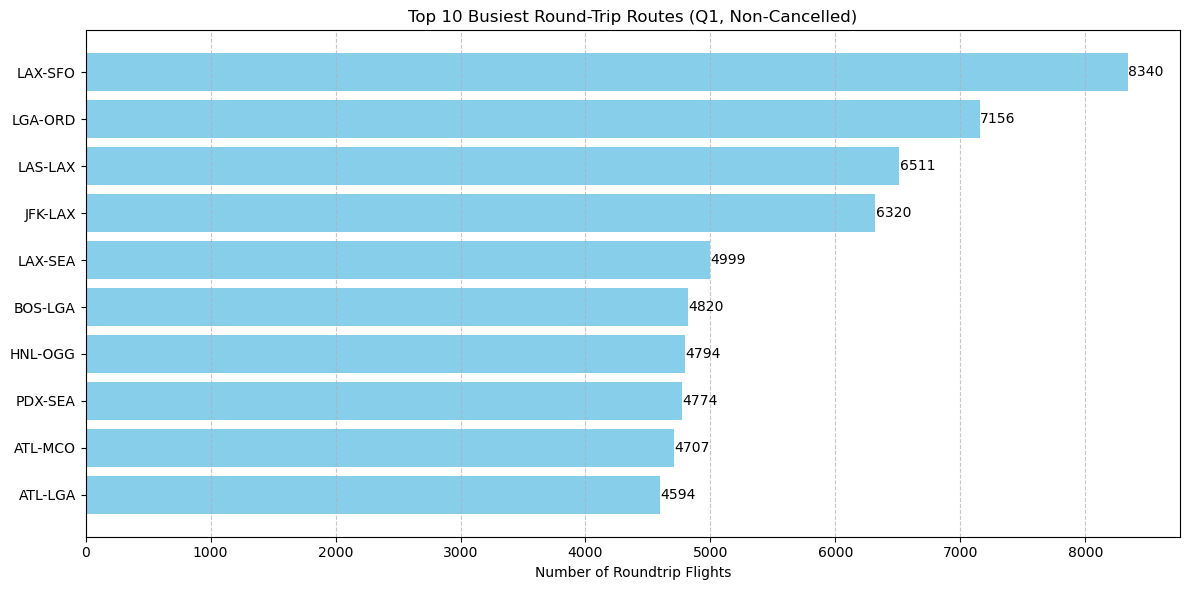

In [1114]:
# TOP 10 busiest Riund Trip Routes.
import matplotlib.pyplot as plt

# Sort and select top 10 routes
top_10_busiest_routes = route_counts.sort_values(by='FlightCount', ascending=False).head(10)
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_busiest_routes['Route'], top_10_busiest_routes['FlightCount'], color='skyblue')
plt.xlabel('Number of Roundtrip Flights')
plt.title('Top 10 Busiest Round-Trip Routes (Q1, Non-Cancelled)')
plt.gca().invert_yaxis()  # Highest at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


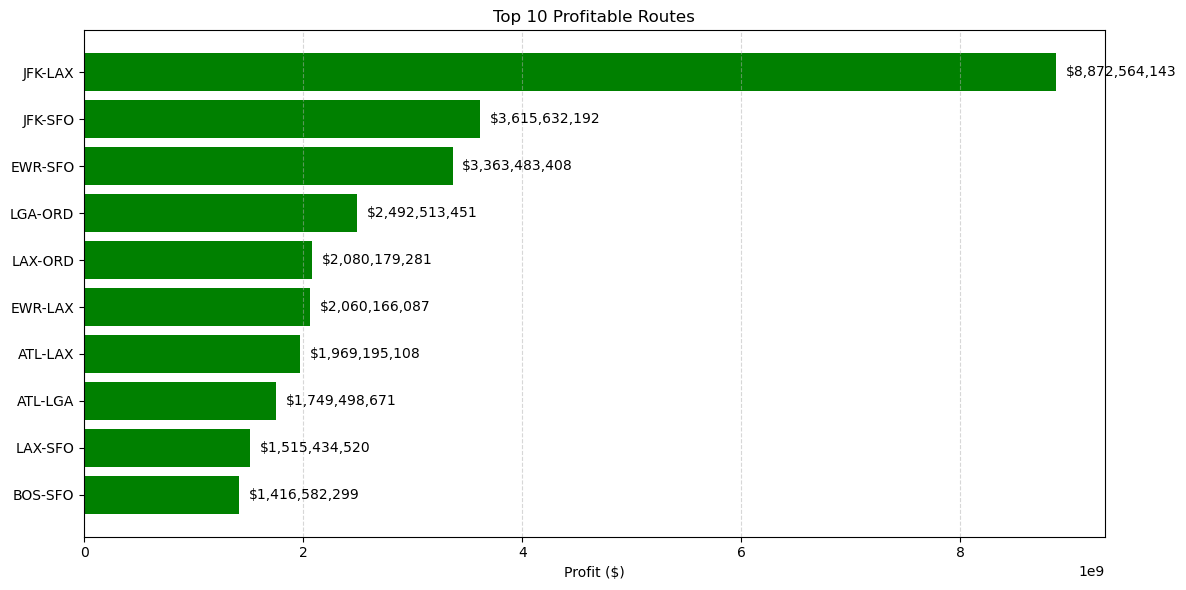

In [1116]:
import matplotlib.pyplot as plt

# Sort top 10 profitable routes
top_10_profitable_routes = ticket_flight.sort_values(by='Profit', ascending=False).head(10)
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_profitable_routes['Route'], top_10_profitable_routes['Profit'], color='green')
plt.xlabel('Profit ($)')
plt.title('Top 10 Profitable Routes')
plt.gca().invert_yaxis()
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01 * max(top_10_profitable_routes['Profit']),
             bar.get_y() + bar.get_height() / 2,
             f'${width:,.0f}', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


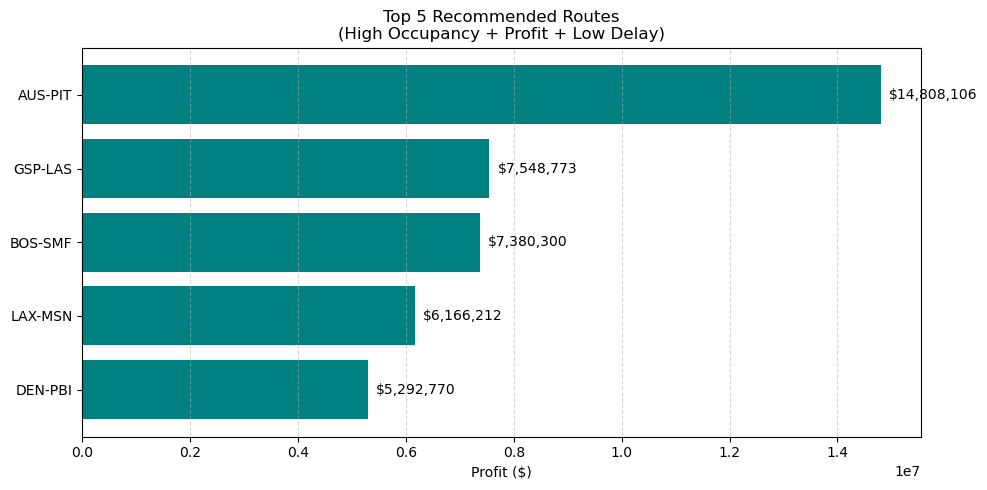

In [1118]:
#Top 5 recommended Routes based on Profit + High Occupancy + Low Delays
import matplotlib.pyplot as plt

# Ensure the data is sorted
recommended_routes = ticket_flight[
    (ticket_flight['Avg_Occupancy'] > 0.7) & 
    (ticket_flight['Total_Delay_Cost'] < ticket_flight['Total_Delay_Cost'].quantile(0.75))
].sort_values(by='Profit', ascending=False).head(5)
plt.figure(figsize=(10, 5))
bars = plt.barh(recommended_routes['Route'], recommended_routes['Profit'], color='teal')
plt.xlabel('Profit ($)')
plt.title('Top 5 Recommended Routes\n(High Occupancy + Profit + Low Delay)')
plt.gca().invert_yaxis()
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01 * max(recommended_routes['Profit']),
             bar.get_y() + bar.get_height() / 2,
             f'${width:,.0f}', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


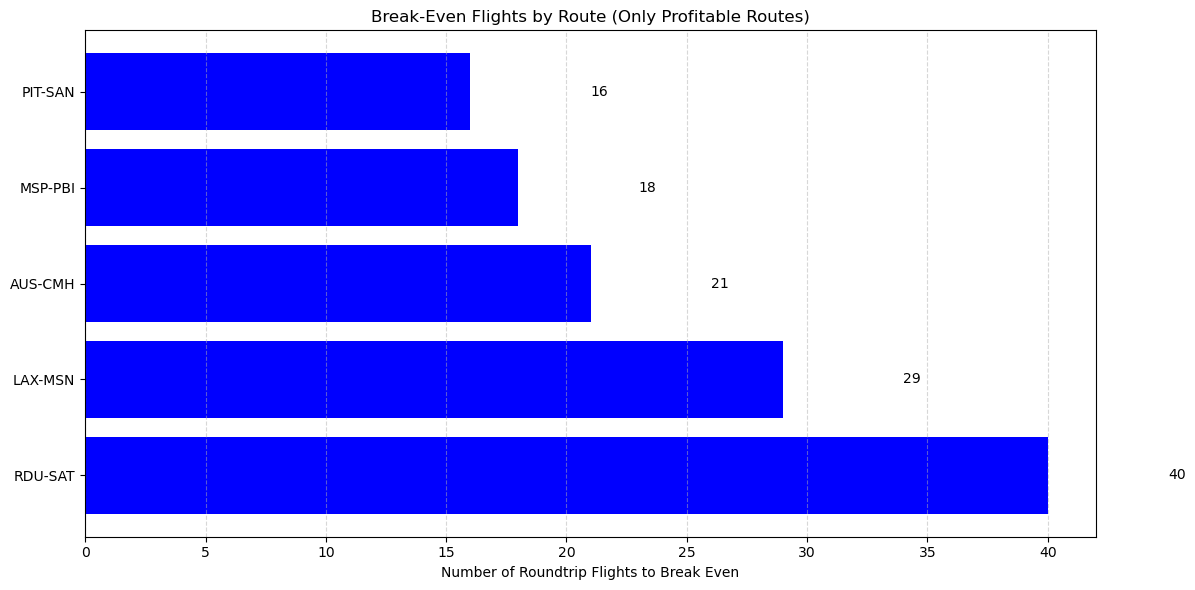

In [1120]:
import matplotlib.pyplot as plt

# Filter: only routes with positive BreakEven_Flights
Break_even_positive = Break_even[Break_even['BreakEven_Flights'] > 0]
Break_even_top = Break_even_positive.sort_values(by='BreakEven_Flights').head(5)
plt.figure(figsize=(12, 6))
bars = plt.barh(Break_even_top['Route'], Break_even_top['BreakEven_Flights'], color='blue')
plt.xlabel('Number of Roundtrip Flights to Break Even')
plt.title('Break-Even Flights by Route (Only Profitable Routes)')
plt.gca().invert_yaxis()
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
